In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sb

In [2]:
# Read the dataset
dataset = pd.read_csv('./IoT_Weather.csv')
dataset.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [3]:
# Remove the time and date 
dataset = dataset.drop('date', axis=1)
dataset = dataset.drop('time', axis=1)
dataset.head()

,temperature,pressure,humidity,label,type
0,31.788508,1.035,32.036579,0,normal
1,41.630997,1.035,30.886165,0,normal
2,42.256959,1.035,19.755908,0,normal
3,49.116581,1.035,78.949621,0,normal
4,24.017085,1.035,40.001059,0,normal


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650242 entries, 0 to 650241
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   temperature  650242 non-null  float64
 1   pressure     650242 non-null  float64
 2   humidity     650242 non-null  float64
 3   label        650242 non-null  int64  
 4   type         650242 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 24.8+ MB


In [5]:
dataset['label'].value_counts()

label
0    559718
1     90524
Name: count, dtype: int64

<Axes: xlabel='label'>

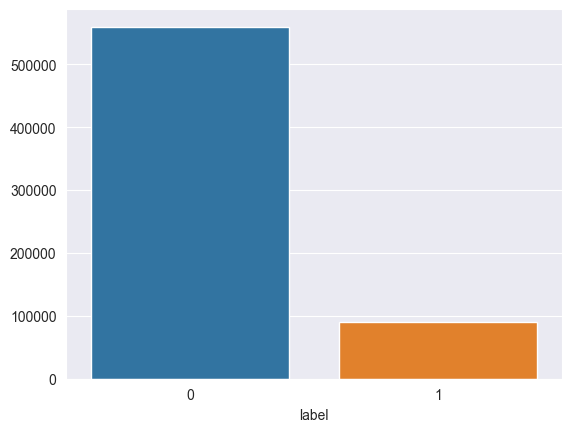

In [6]:
sb.barplot(y=dataset['label'].value_counts().values, x=dataset['label'].value_counts().index)

In [7]:
dataset['type'].value_counts()

type
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

<Axes: xlabel='type'>

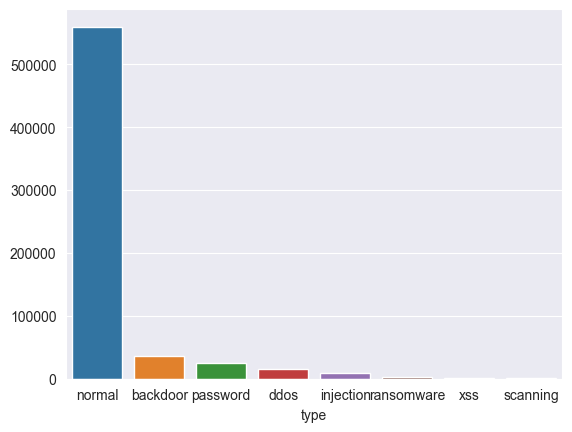

In [8]:
sb.barplot(y=dataset['type'].value_counts().values, x=dataset['type'].value_counts().index)

<Axes: title={'center': 'Labels Distribution'}>

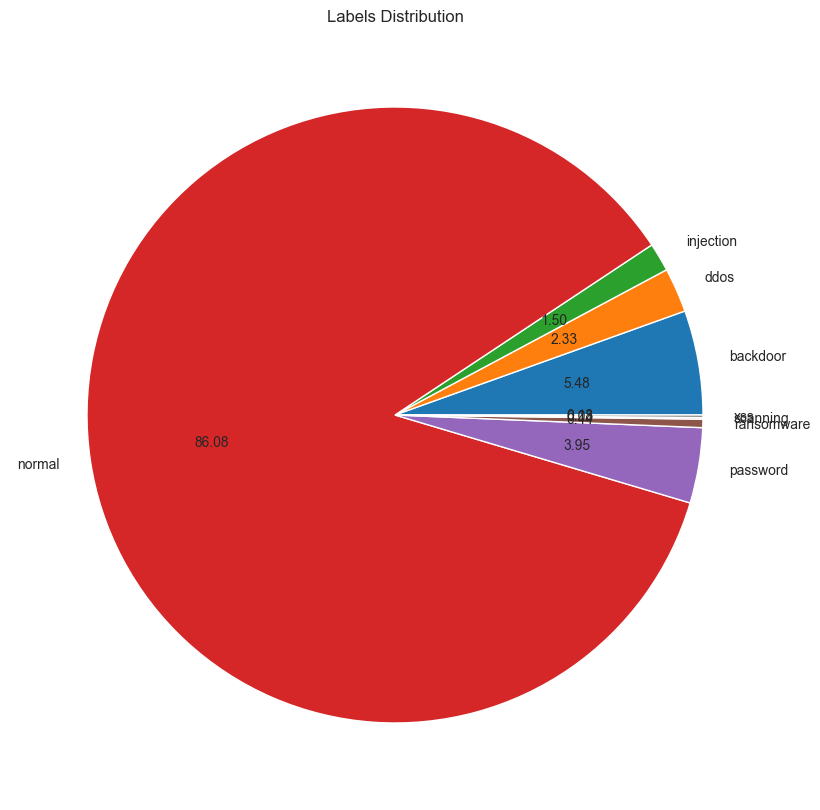

In [9]:
# Show the labels distribution
plt.title("Labels Distribution")
dataset.groupby('type').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [10]:
# Mapping the type to the integer
mapping = {'normal': 0, 'backdoor': 1, 'password': 2, 'ddos': 3, 'injection': 4, 'ransomware': 5, 'xss': 6, 'scanning': 7}
dataset['type'] = dataset['type'].replace(mapping)
dataset = dataset.drop('label', axis=1)
dataset.head()

,temperature,pressure,humidity,type
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


In [11]:
dataset['type'].value_counts()

type
0    559718
1     35641
2     25715
3     15182
4      9726
5      2865
6       866
7       529
Name: count, dtype: int64

In [12]:
shuffled = dataset.sample(frac=1, random_state=42)
shuffled.to_csv("./data.csv",index=False,header=True)

In [13]:
# Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(dataset.iloc[:, :-1], dataset.iloc[:, -1])
balance_dataset = pd.DataFrame(X)
balance_dataset['target'] = y
balance_dataset.head()

,temperature,pressure,humidity,target
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


In [14]:
balance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4477744 entries, 0 to 4477743
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   temperature  float64
 1   pressure     float64
 2   humidity     float64
 3   target       int64  
dtypes: float64(3), int64(1)
memory usage: 136.7 MB


In [15]:
balance_dataset['target'].value_counts()

target
0    559718
1    559718
3    559718
4    559718
2    559718
5    559718
7    559718
6    559718
Name: count, dtype: int64

<Axes: xlabel='target'>

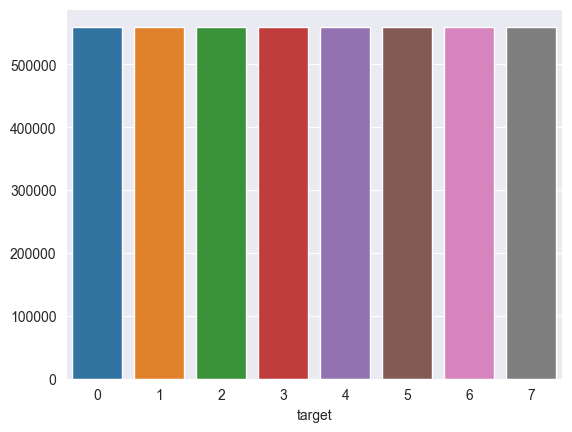

In [16]:
sb.barplot(y=balance_dataset['target'].value_counts().values, x=balance_dataset['target'].value_counts().index)

In [17]:
print("Size of the balanced dataset:", int(len(balance_dataset)))

Size of the balanced dataset: 4477744


<Axes: title={'center': 'Labels Distribution'}>

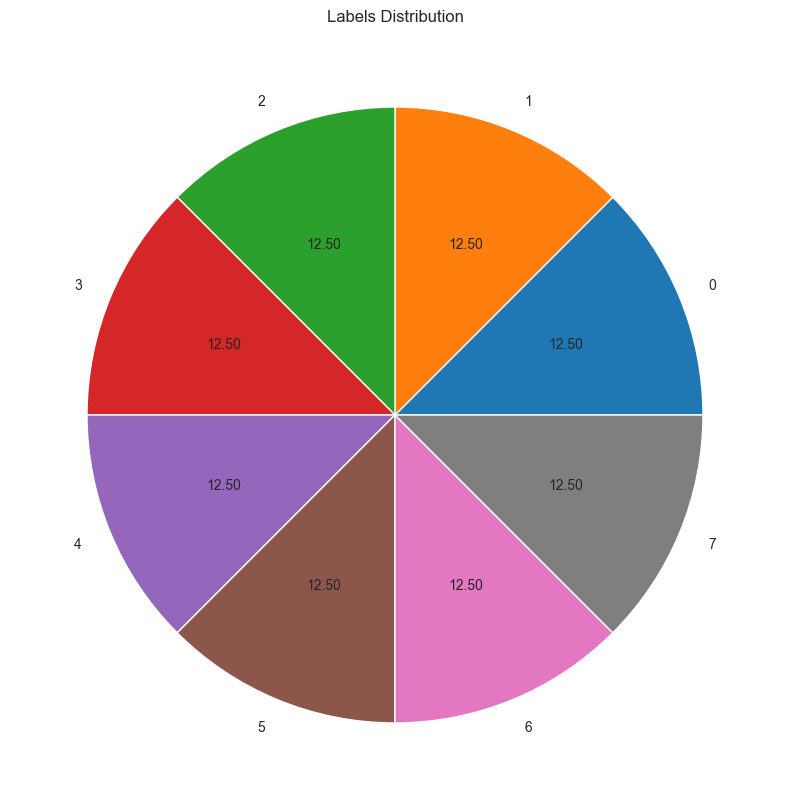

In [18]:
plt.title("Labels Distribution")
balance_dataset.groupby('target').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [19]:
# Shuffle the dataset, and write a new dataset file
shuffled = balance_dataset.sample(frac=1, random_state=42)
shuffled.to_csv("./balance_data.csv",index=False,header=True)